In [1]:
#load relevant modules
import pandas as pd
import numpy as np

#Expand display for dataframe 
pd.options.display.max_columns = 50

In [2]:
#import dataset
df = pd.read_csv("diabetic_data.csv")
df.shape
# df.head()

(101766, 50)

In [3]:
df_1 = df.replace('?', None)
df_1.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),None,6,25,1,1,None,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,None,None,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),None,1,1,7,3,None,None,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),None,1,1,7,2,None,None,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),None,1,1,7,2,None,None,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),None,1,1,7,1,None,None,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
#to check the number of missing values accross the colums
df_1.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [5]:
#remove columns with too many missing values
df_2 = df_1.drop(['weight', 'payer_code', 'medical_specialty','A1Cresult', 'max_glu_serum', 'encounter_id'], axis = 1)

# df_2.shape

In [6]:
df_3 = df_2.dropna()
# df_3.shape

In [7]:
df_3.isnull().any().any()

False

In [8]:
#to reset index
df_4 = df_3.reset_index(drop = True)

In [9]:
df_4['readmitted'].unique()

array(['>30', 'NO', '<30'], dtype=object)

In [10]:
#try to filter out none numeric in the column
pattern = "V", "E"
filter_df = df_4["diag_1"].str.startswith(pattern)
sum(filter_df)

1601

In [11]:
df_5 = df_4[~filter_df]
df_5.shape

(96452, 44)

In [12]:
#to reset index
df_5 = df_5.reset_index(drop = True)
# df_5.head()

In [13]:
#filter out none numeric in the column
pattern = "V", "E"
filter_df_1 = df_5["diag_2"].str.startswith(pattern)
sum(filter_df_1)

2234

In [14]:
df_6 = df_5[~filter_df_1]
df_6.shape

(94218, 44)

In [15]:
#to reset index
df_6 = df_6.reset_index(drop = True)
# df_6.head()

In [16]:
#try to filter out none numeric in the column
pattern = "V", "E"
filter_df_2 = df_6["diag_3"].str.startswith(pattern)
sum(filter_df_2)

4436

In [17]:
df_7 = df_6[~filter_df_2]
df_7.shape

(89782, 44)

In [18]:
#to reset index
df_7 = df_7.reset_index(drop = True)
# df_7.head()

In [19]:
#duplicate and rename readmitted column
df_7['class'] = df_7['readmitted']

# df_7.head()

In [20]:
# Replace the values of class coulumn
df_7['class'] = df_7['class'].replace('>30', 'Readmission')
df_7['class'] = df_7['class'].replace('<30', 'Readmission')
df_7['class'] = df_7['class'].replace('NO', 'No_readmission')
# df_7.head()

In [21]:
# to delete the column readmitted 
del df_7['readmitted']
# df_7.head()

In [22]:
df_7['race'].unique()

array(['Caucasian', 'AfricanAmerican', 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [23]:
#try to filter out none numeric in the column
pattern = "U"
filter_df_3 = df_7["gender"].str.startswith(pattern)
sum(filter_df_3)

1

In [24]:
df_8 = df_7[~filter_df_3]
# df_8.shape

In [25]:
#to reset index
df_8 = df_8.reset_index(drop = True)
# df_8.head()

In [26]:
# Applying OneHot Encoding to columns with none nominal variable
df2=pd.get_dummies(df_8[["race", "gender"]])
df_new=pd.concat([df_8,df2],axis=1)
df_new = df_new.drop(['race', 'gender'], axis = 1)
# df_new.head()

In [27]:
#duplicate and rename age column
df_new['avg_age'] = df_new['age']

# df_new.head()

In [28]:
# Replace the values of avg_age coulumn
df_new['avg_age'] = df_new['avg_age'].replace('[0-10)', '5')
df_new['avg_age'] = df_new['avg_age'].replace('[10-20)', '15')
df_new['avg_age'] = df_new['avg_age'].replace('[20-30)', '25')
df_new['avg_age'] = df_new['avg_age'].replace('[30-40)', '35')
df_new['avg_age'] = df_new['avg_age'].replace('[40-50)', '45')
df_new['avg_age'] = df_new['avg_age'].replace('[50-60)', '55')
df_new['avg_age'] = df_new['avg_age'].replace('[60-70)', '65')
df_new['avg_age'] = df_new['avg_age'].replace('[70-80)', '75')
df_new['avg_age'] = df_new['avg_age'].replace('[80-90)', '85')
df_new['avg_age'] = df_new['avg_age'].replace('[90-100)', '95')
# df_new.head()
# df_new.info()

In [29]:
# to delete a column 
del df_new['age']
# df_new.head()
# df_new.info

In [30]:
# move column class to the last

df_new.insert(48, 'class', df_new.pop('class'))
# df_new.head()


In [31]:
from sklearn.preprocessing import OrdinalEncoder

In [32]:
enc = OrdinalEncoder()
# print(enc)

In [33]:
# enc.fit_transform(df_new[["metformin"]])

In [34]:
df_new[["metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride", "acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose", "miglitol", "troglitazone", "tolazamide", "examide", "citoglipton", "insulin", "glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone", "change", "diabetesMed"]] = enc.fit_transform(df_new[["metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride", "acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose", "miglitol", "troglitazone", "tolazamide", "examide", "citoglipton", "insulin", "glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone", "change", "diabetesMed"]])
# df_new.head()

In [35]:
#define dataset
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
#Get the array of the independent variables and target
X = df_new.iloc[:, :-1].values
y = df_new.iloc[:, -1].values

# print(X[:5, :5])
# print(y[0:5])

In [36]:

#update X to scaled value
X = df_new.iloc[:, :-1].values

# print(X[0:5, 0:5])

# Normalization with MinMAxScaler

# build the scaler model
scaler = MinMaxScaler()

#fit using the train set
# scaler.fit(X)
scaler.fit(X)

#transform the test data
X_scaled = scaler.transform(X)

# verify minimum value of all features
# X_scaled.min(axis=0)

# X_scaled

In [37]:
#split the dataset
X = X_scaled
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, stratify=y)

Logistic Regression 

In [38]:
#Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\mylap\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [39]:
#Predicting the Test set results
y_pred = classifier.predict(X_test)

In [40]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[9417 2559]
 [6074 4396]]


0.6153880424129021

In [41]:
#Computing the accuracy with k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

C:\Users\mylap\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mylap\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Accuracy: 61.52 %
Standard Deviation: 0.46 %


C:\Users\mylap\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Support Vector Model

In [42]:
# Import the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [43]:
# Split Dataset into X and Y
X = df_new.iloc[:, [2, 3]].values
y = df_new.iloc[:, 4].values

# print(X[0:5, 0:5])
# print(y[0:5])

#Split the X and Y Dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#Perform Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


#Fit SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)


#Predict the Test Set Results
y_pred = classifier.predict(X_test)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)


[[1046 1446  490   16    1    0    0    0    0    0    0    0    0    0]
 [ 871 2073  739   33    2    0    0    0    0    0    0    0    0    0]
 [ 759 1864 1248   61    0    0    0    0    0    0    0    0    0    0]
 [ 588 1388 1169   58    3    0    0    0    0    0    0    0    0    0]
 [ 348  895  910   47    0    0    0    0    0    0    0    0    0    0]
 [ 319  579  791   46    0    0    0    0    0    0    0    0    0    0]
 [ 230  402  639   45    0    0    0    0    0    0    0    0    0    0]
 [ 164  321  474   30    0    0    0    0    0    0    0    0    0    0]
 [  98  198  354   25    0    0    0    0    0    0    0    0    0    0]
 [  60  144  245   17    0    0    0    0    0    0    0    0    0    0]
 [  51  102  218   26    0    0    0    0    0    0    0    0    0    0]
 [  41   84  174   18    1    0    0    0    0    0    0    0    0    0]
 [  32   64  147   11    0    0    0    0    0    0    0    0    0    0]
 [  35   51  144   10    1    0    0    0    0    0

0.19713980219192728

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


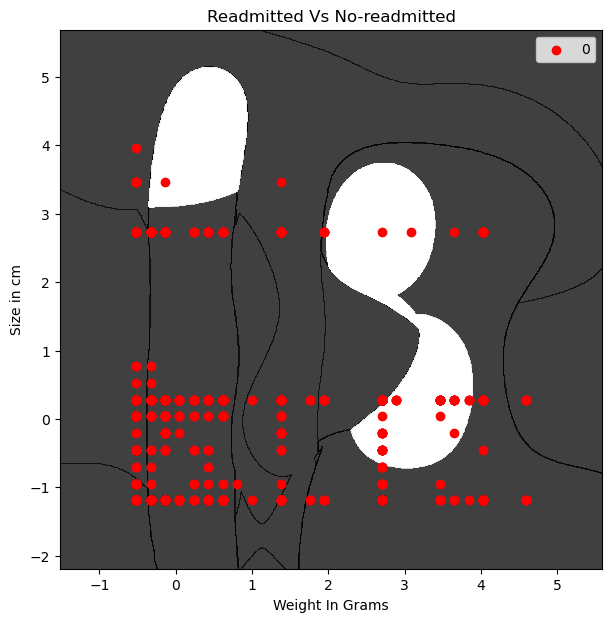

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


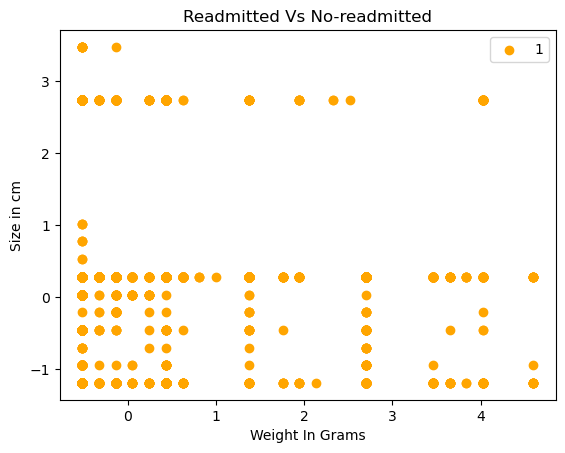

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


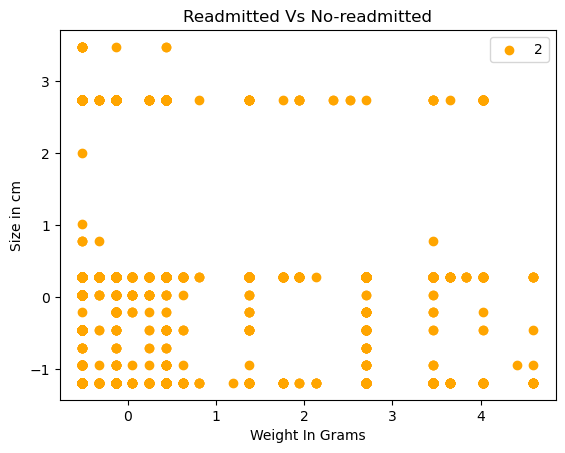

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


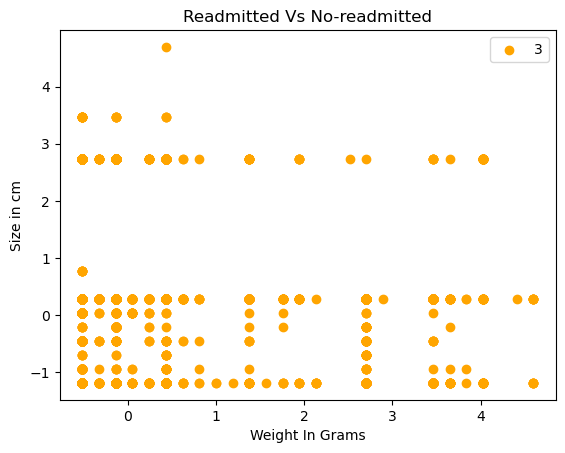

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


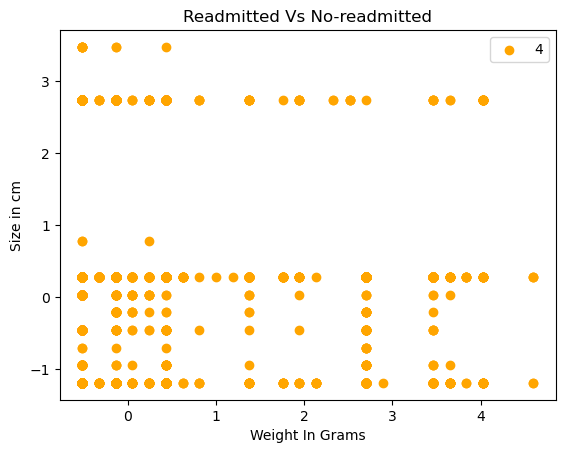

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


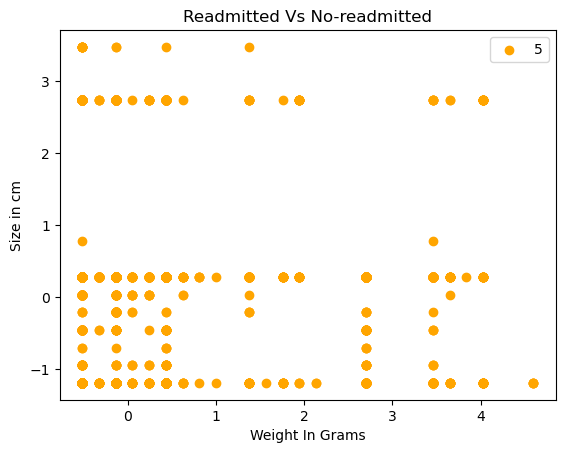

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


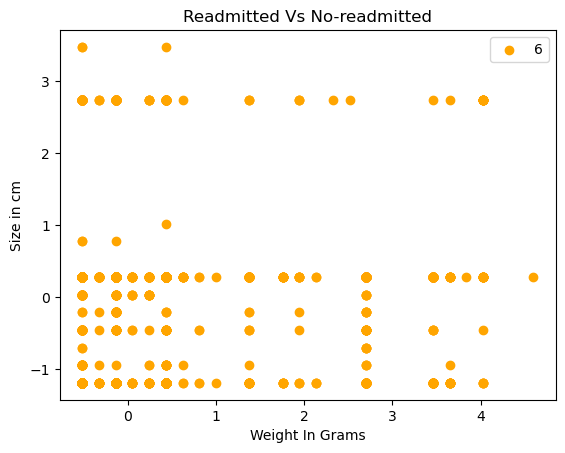

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


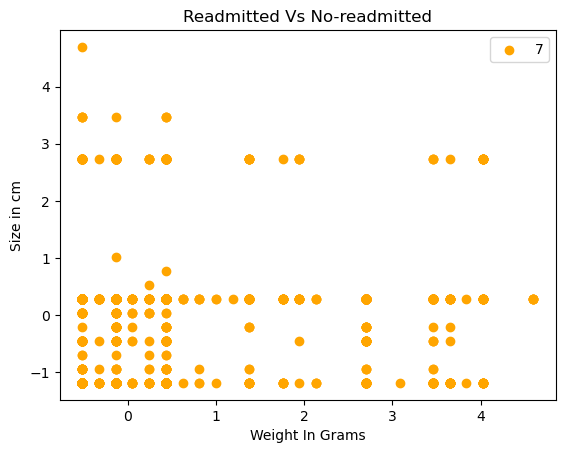

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


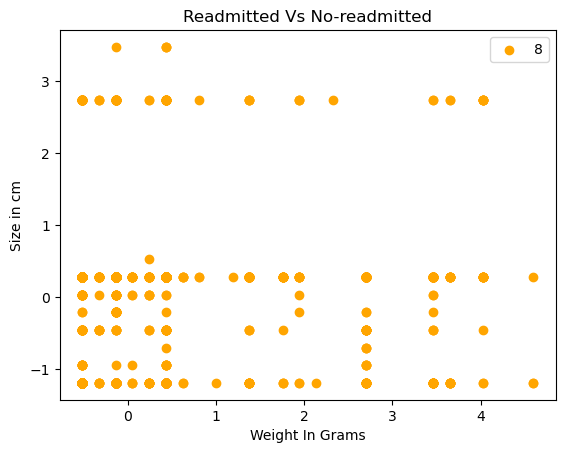

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


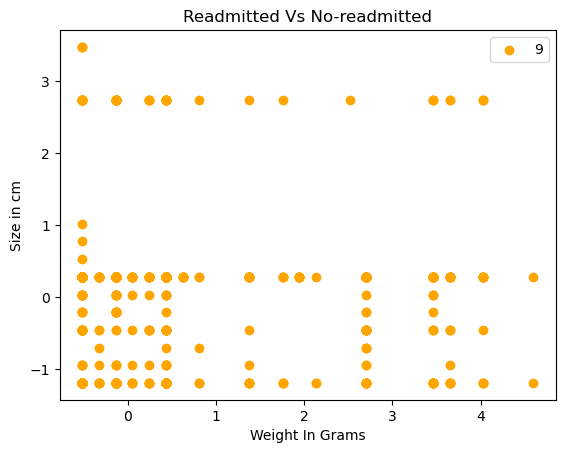

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


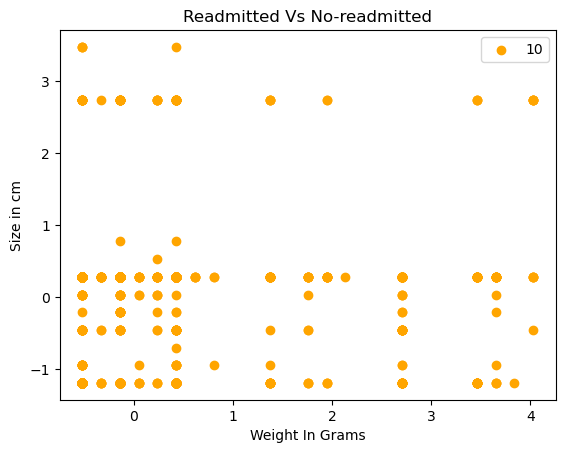

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


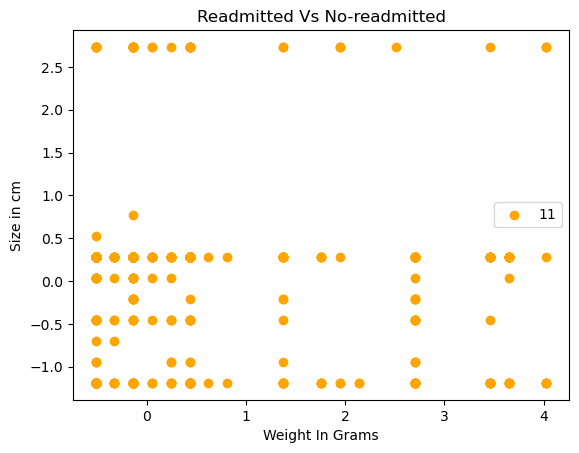

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


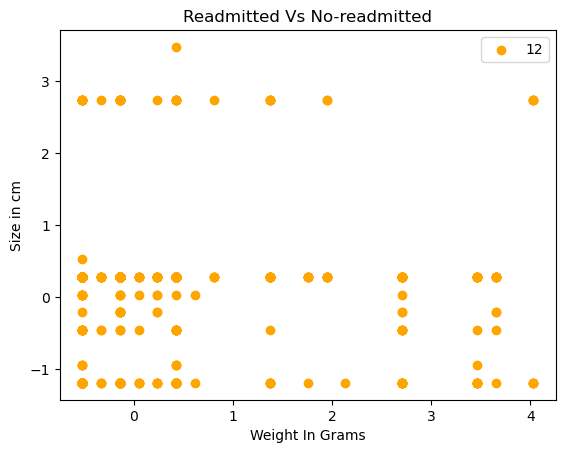

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


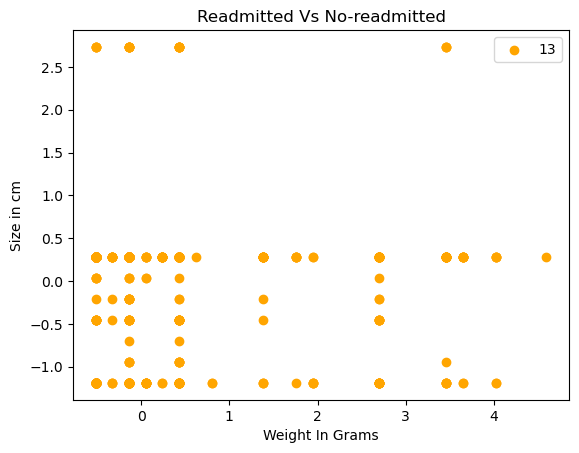

In [44]:
# Visualizing the predictions

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

# fit the encoded data to the SVM

from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train,y_train)

# Visualize

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.figure(figsize = (7,7))
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('black', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'orange'))(i), label = j)
    plt.title('Readmitted Vs No-readmitted')
    plt.xlabel('Weight In Grams')
    plt.ylabel('Size in cm')
    plt.legend()
    plt.show()